# Shap
Shap, bir makine öğrenimi modelinin nasıl karar verdiğini anlamak için kullanılan bir araçtır. Shap, modelin verdiği kararın nedenlerini açıklayarak, modelin nasıl işlediğini anlamaya yardımcı olur. Örneğin, bir görüntü tanıma modeli kullanarak bir resmin ne olduğunu tahmin etmeye çalıştığınızda, Shap size hangi özelliklerin resmi hangi kategoriye (örneğin, bir köpek resmi) atama kararı verdiğini gösterebilir. Böylece, modelin nasıl işlediğini anlayabilir ve modelin performansını iyileştirebilirsiniz.



In [1]:
# Pandas
import pandas as pd

# Some sklearn tools for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Tree based algorithms
from sklearn.ensemble import RandomForestClassifier

# XAI
import shap

In [2]:
names = ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
features = names[:-1]
df = pd.read_csv("veriler/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
count_class = df.groupby("Species").size()
count_class


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [4]:
X = df.drop(["Species","Id"], axis=1)
Y = df["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

Random Forest algoritmasını eğitiyoruz.

In [5]:
rf_model = RandomForestClassifier(n_estimators=100).fit(x_train, y_train)

Algoritmamızın doğruluğunu ölçüyoruz.

In [6]:
y_predicted = rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_predicted)
print("Precisión: ",  accuracy*100, "%")

Precisión:  94.0 %


Random forest modelini kullanarak bir Shap explainer nesnesi oluşturur.Daha sonra, shap. TreeExplainer fonksiyonu kullanılarak bir Shap explainer nesnesi oluşturulur. Bu nesne, Random Forest modelinin nasıl karar verdiğini anlamak için kullanılabilir.

In [7]:
explainer = shap.TreeExplainer(rf_model)

Test veri setindeki ilk satırı ve bu satırdaki beklenen sınıfı ekrana yazdırılır.                                   
Aynı zamanda, seçilen satırdaki beklenen sınıf da y_test veri setinden alınarak yazdırılır.

In [13]:
print(x_test.iloc[0])
print("Expected: ", y_test.iloc[0])

SepalLengthCm    5.1
SepalWidthCm     3.7
PetalLengthCm    1.5
PetalWidthCm     0.4
Name: 21, dtype: float64
Expected:  Iris-setosa


Shap explainer kullanarak bir örnek için modelin nasıl karar verdiğini açıklar. Öncelikle, explainer.shap_values fonksiyonu kullanılarak seçilen örnek için modelin nasıl karar verdiğini açıklayan Shap değerleri elde edilir. Daha sonra, shap.force_plot fonksiyonu kullanılarak bu değerler kullanılarak bir görsel oluşturulur. Görsel, seçilen örnek için modelin nasıl karar verdiğini gösterir.

In [9]:
shap_values = explainer.shap_values(observation)
shap.force_plot(explainer.expected_value[0], shap_values[0], features=observation)


Shap explainer kullanarak bir eğitim veri setindeki tüm örnekler için modelin nasıl karar verdiğini açıklar.

In [10]:
all_shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value[0], all_shap_values[0], features=x_train)

Shap explainer kullanarak bir eğitim veri setindeki tüm örnekler için modelin nasıl karar verdiğini açıklar. 

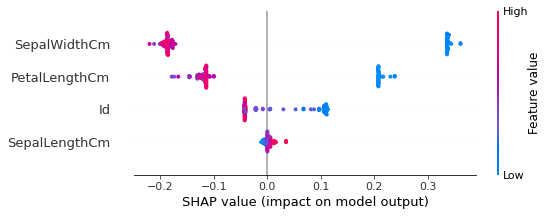

In [11]:
shap.summary_plot(all_shap_values[0], features=x_train, feature_names=features)
